In [2]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV files into DataFrames
df_lstm_0 = pd.read_csv("log_lstm_imp0/training_log_lstm_0.csv")
df_lstm_1 = pd.read_csv("log_lstm_imp1/training_log_lstm_1.csv")
df_lstm_2 = pd.read_csv("log_lstm_imp2/training_log_lstm_2.csv")
df_trans_0 = pd.read_csv("log_trans_imp0/training_log_trans_0.csv")
df_trans_1 = pd.read_csv("log_trans_imp1/training_log_trans_1.csv")
df_trans_2 = pd.read_csv("log_trans_imp2/training_log_trans_2.csv")

# Display the first 5 rows of each DataFrame
print("First 5 rows of training_log_lstm_0.csv:")
print(df_lstm_0.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of training_log_lstm_1.csv:")
print(df_lstm_1.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of training_log_lstm_2.csv:")
print(df_lstm_2.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of training_log_trans_0.csv:")
print(df_trans_0.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of training_log_trans_1.csv:")
print(df_trans_1.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of training_log_trans_2.csv:")
print(df_trans_2.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types for each DataFrame
print("\nColumns and types of training_log_lstm_0.csv:")
print(df_lstm_0.info())

print("\nColumns and types of training_log_lstm_1.csv:")
print(df_lstm_1.info())

print("\nColumns and types of training_log_lstm_2.csv:")
print(df_lstm_2.info())

print("\nColumns and types of training_log_trans_0.csv:")
print(df_trans_0.info())

print("\nColumns and types of training_log_trans_1.csv:")
print(df_trans_1.info())

print("\nColumns and types of training_log_trans_2.csv:")
print(df_trans_2.info())

First 5 rows of training_log_lstm_0.csv:
| Epoch   | TrainLoss   | ValLoss   |
|:--------|:------------|:----------|
| 1       | 1360.51     | 1388.12   |
| 2       | 919.969     | 1470.07   |
| 3       | 597.929     | 1491.86   |
| 4       | 396.091     | 344.903   |
| 5       | 332.291     | 446.416   |

First 5 rows of training_log_lstm_1.csv:
| Epoch   | TrainLoss   | ValLoss   |
|:--------|:------------|:----------|
| 1       | 1381.27     | 1302.39   |
| 2       | 889.517     | 1101.54   |
| 3       | 543.076     | 612.279   |
| 4       | 386.064     | 317.331   |
| 5       | 315.185     | 284.936   |

First 5 rows of training_log_lstm_2.csv:
| Epoch   | TrainLoss   | ValLoss   |
|:--------|:------------|:----------|
| 1       | 1363.64     | 1340.55   |
| 2       | 894.213     | 533.45    |
| 3       | 539.32      | 611.989   |
| 4       | 391.856     | 357.25    |
| 5       | 321.886     | 281.497   |

First 5 rows of training_log_trans_0.csv:
| Epoch   | TrainLoss   | ValLoss 

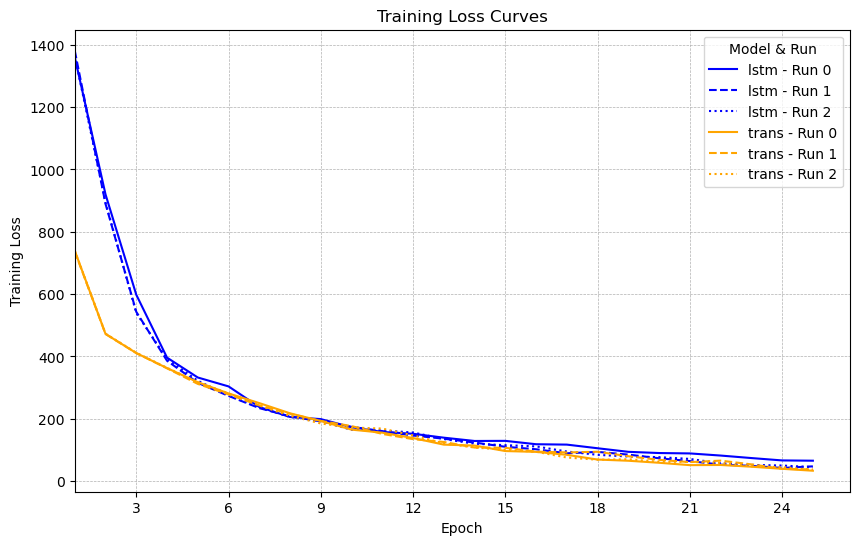

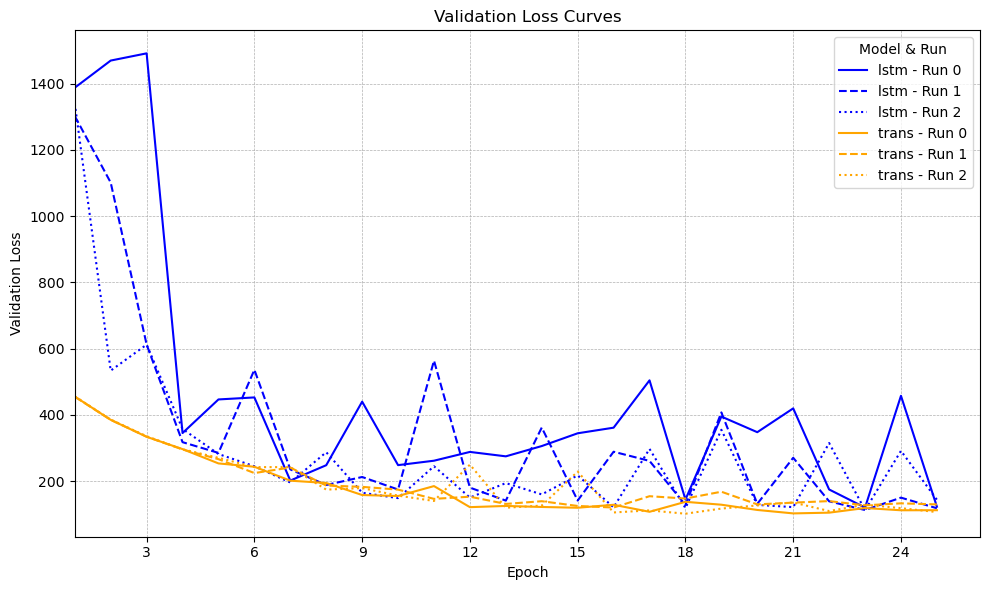

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Add Model and Run columns
df_lstm_0['Model'] = 'lstm'
df_lstm_0['Run'] = 0
df_lstm_1['Model'] = 'lstm'
df_lstm_1['Run'] = 1
df_lstm_2['Model'] = 'lstm'
df_lstm_2['Run'] = 2

df_trans_0['Model'] = 'trans'
df_trans_0['Run'] = 0
df_trans_1['Model'] = 'trans'
df_trans_1['Run'] = 1
df_trans_2['Model'] = 'trans'
df_trans_2['Run'] = 2

# Concatenate all dataframes
all_logs = pd.concat([df_lstm_0, df_lstm_1, df_lstm_2, df_trans_0, df_trans_1, df_trans_2], ignore_index=True)

# Define color and line style mappings
color_map = {'lstm': 'blue', 'trans': 'orange'}
style_map = {0: '-', 1: '--', 2: ':'} # Solid, dashed, dotted

# Plotting
fig_train, ax_train = plt.subplots(figsize=(10, 6))
fig_val, ax_val = plt.subplots(figsize=(10, 6))

# Iterate through each model and run to plot
for model in all_logs['Model'].unique():
    for run in all_logs['Run'].unique():
        # Filter data for the specific model and run
        subset = all_logs[(all_logs['Model'] == model) & (all_logs['Run'] == run)]

        if not subset.empty:
            label = f"{model} - Run {run}"
            color = color_map[model]
            linestyle = style_map[run]

            # Plot Training Loss
            ax_train.plot(subset['Epoch'], subset['TrainLoss'], label=label, color=color, linestyle=linestyle)

            # Plot Validation Loss
            ax_val.plot(subset['Epoch'], subset['ValLoss'], label=label, color=color, linestyle=linestyle)

# --- Configure Training Loss Plot ---
ax_train.set_title('Training Loss Curves')
ax_train.set_xlabel('Epoch')
ax_train.set_ylabel('Training Loss')
# Ensure x-axis shows integer ticks starting from 1
ax_train.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax_train.set_xlim(left=all_logs['Epoch'].min()) # Start x-axis from the minimum epoch
ax_train.grid(True, which='both', linestyle='--', linewidth=0.5)
ax_train.legend(title="Model & Run")

# --- Configure Validation Loss Plot ---
ax_val.set_title('Validation Loss Curves')
ax_val.set_xlabel('Epoch')
ax_val.set_ylabel('Validation Loss')
# Ensure x-axis shows integer ticks starting from 1
ax_val.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax_val.set_xlim(left=all_logs['Epoch'].min()) # Start x-axis from the minimum epoch
ax_val.grid(True, which='both', linestyle='--', linewidth=0.5)
ax_val.legend(title="Model & Run")

# Show plots
plt.tight_layout()
plt.show()